In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Download Automobile dataset from the UCI ML repository

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

In [ ]:
data = heart_disease.data.features
data["target"] = heart_disease.data.targets

In [ ]:
#Inspect data to find out number of classes
data["target"].unique()

array([0, 2, 1, 3, 4])

## **PART 1: TREE-BASED CLASSIFICATION**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [ ]:
k_folds = StratifiedKFold(n_splits=10)

In [ ]:
n_classes =

### **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score


In [ ]:
dtree = DecisionTreeClassifier()
scores = cross_val_score(dtree, heart_disease.data.features, heart_disease.data.targets, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.58064516 0.41935484 0.58064516 0.46666667 0.56666667 0.26666667
 0.4        0.5        0.43333333 0.5       ]
Average CV Score:  0.47139784946236557


In [ ]:
predictions = cross_val_predict(dtree, heart_disease.data.features, heart_disease.data.targets["num"], cv=k_folds)
predictions_proba = cross_val_predict(dtree, heart_disease.data.features, heart_disease.data.targets["num"], cv=k_folds, method='predict_proba')
acc_dt= accuracy_score(heart_disease.data.targets, predictions)
f1_dt  = f1_score(heart_disease.data.targets, predictions, average="weighted")
auroc_dt = roc_auc_score(heart_disease.data.targets, predictions_proba, multi_class='ovr', average='macro')
metrics_dt = [acc_dt, f1_dt, auroc_dt]
print("Confusion Matrix: \n", confusion_matrix(heart_disease.data.targets, predictions))
print("Accuracy: ", acc_dt)
print("F1 Score: ", f1_dt)
print("ROC AUC Score: ", auroc_dt)

Confusion Matrix: 
 [[129  27   2   5   1]
 [ 21  15   8  10   1]
 [  6  10   9   9   2]
 [  4  14   7   7   3]
 [  0   4   4   4   1]]
Accuracy:  0.5313531353135313
F1 Score:  0.5341546853098007
ROC AUC Score:  0.5692459134712509


array([0, 2, 1, 3, 4])

### **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rtree = RandomForestClassifier()
scores = cross_val_score(rtree, heart_disease.data.features, heart_disease.data.targets, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

In [ ]:
predictions = cross_val_predict(rtree, heart_disease.data.features, heart_disease.data.targets["num"], cv=k_folds)
predictions_proba = cross_val_predict(rtree, heart_disease.data.features, heart_disease.data.targets["num"], cv=k_folds, method='predict_proba')
acc_rf= accuracy_score(heart_disease.data.targets, predictions)
f1_rf  = f1_score(heart_disease.data.targets, predictions, average="weighted")
auroc_rf = roc_auc_score(heart_disease.data.targets, predictions_proba, multi_class="ovr")
metrics_rf = [acc_rf, f1_rf, auroc_rf]
print("Confusion Matrix: \n", confusion_matrix(heart_disease.data.targets, predictions))
print("Accuracy: ", acc_rf)
print("F1 Score: ", f1_rf)
print("ROC AUC Score: ", auroc_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Confusion Matrix: 
 [[153   8   3   0   0]
 [ 34   7   7   7   0]
 [ 14   6  10   6   0]
 [  7  13  10   4   1]
 [  2   3   3   5   0]]
Accuracy:  0.5742574257425742
F1 Score:  0.5211169858404605
ROC AUC Score:  0.7776100191851862


### **Boosting**

In [ ]:
import xgboost as xgb

In [ ]:
clf = xgb.XGBClassifier(tree_method="hist")
scores = cross_val_score(clf, heart_disease.data.features, heart_disease.data.targets, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.61290323 0.4516129  0.51612903 0.53333333 0.76666667 0.33333333
 0.36666667 0.6        0.46666667 0.5       ]
Average CV Score:  0.5147311827956988


In [ ]:
predictions = cross_val_predict(clf, heart_disease.data.features, heart_disease.data.targets["num"], cv=k_folds)
predictions_proba = cross_val_predict(clf, heart_disease.data.features, heart_disease.data.targets["num"], cv=k_folds, method='predict_proba')
acc_boost = accuracy_score(heart_disease.data.targets, predictions)
f1_boost  = f1_score(heart_disease.data.targets, predictions, average="weighted")
auroc_boost = roc_auc_score(heart_disease.data.targets, predictions_proba, multi_class="ovr")
metrics_boost = [acc_boost, f1_boost, auroc_boost]
print("Confusion Matrix: \n", confusion_matrix(heart_disease.data.targets, predictions))
print("Accuracy: ", acc_boost)
print("F1 Score: ", f1_boost)
print("ROC AUC Score: ", auroc_boost)

Confusion Matrix: 
 [[147   6   7   4   0]
 [ 28   7   9  11   0]
 [ 10   7   9   9   1]
 [  2  12  12   4   5]
 [  1   3   4   5   0]]
Accuracy:  0.5511551155115512
F1 Score:  0.5216701642153011
ROC AUC Score:  0.7589197046883803


### **Comparison between models**

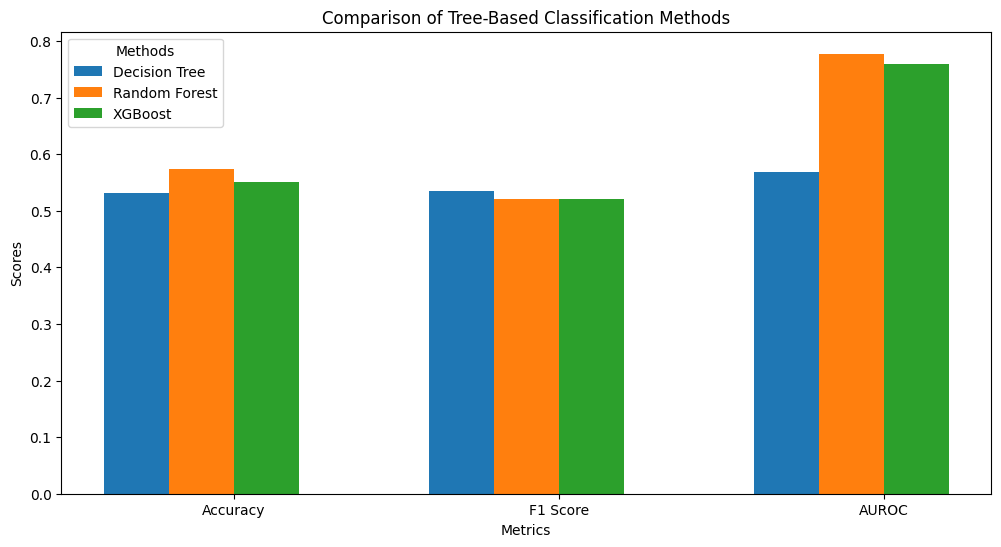

In [ ]:
# Organize metrics for plotting
metrics = np.array([metrics_dt, metrics_rf, metrics_boost])
metrics_labels = ['Accuracy', 'F1 Score', 'AUROC']
methods = ['Decision Tree', 'Random Forest', 'XGBoost']

# Bar width and positions
bar_width = 0.2
x = np.arange(len(metrics_labels))

# Create bar plot
plt.figure(figsize=(12, 6))
for i in range(len(methods)):
    plt.bar(x + (i * bar_width), metrics[i], width=bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Tree-Based Classification Methods')
plt.xticks(x + bar_width * 1.5, metrics_labels)
plt.legend(title='Methods')
plt.show()

## **PART 2: CLUSTERING**

In [ ]:
y_true = data["target"]

### **1. Manual K-Means Implementation**

In [ ]:
def kmeans(X, k, max_iters=100):
    """
    Implements the K-Means clustering algorithm.

    Parameters:
    X: numpy array of data points
    k: number of clusters
    max_iters: maximum number of iterations

    Returns:
    centroids: numpy array of cluster centroids
    labels: numpy array of cluster assignments for each data point
    """

    # Initialize centroids randomly, set a random state to get the same results
    rng = np.random.RandomState(1122)

    centroids = X[rng.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the closest centroid
        labels = np.array([np.argmin(np.linalg.norm(X[i] - centroids, axis=1)) for i in range(X.shape[0])])

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

### **2. Visualize data and find clusters**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Substitute NaN values of features by the mean

for feature in heart_disease.data.features.columns:
  heart_disease.data.features[feature] = heart_disease.data.features[feature].fillna(heart_disease.data.features[feature].mean())

In [ ]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(heart_disease.data.features)
scaled_df = pd.DataFrame(scaled_data, columns=features.columns)

In [ ]:
# Apply PCA
pca = PCA(n_components=3)  # You can adjust the number of components
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2", "PC3"])
pca_df["Class"] = heart_disease.data.targets["num"]

# Get the PCA components and feature names
components_df = pd.DataFrame(pca.components_, columns=features.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
#print(components_df)

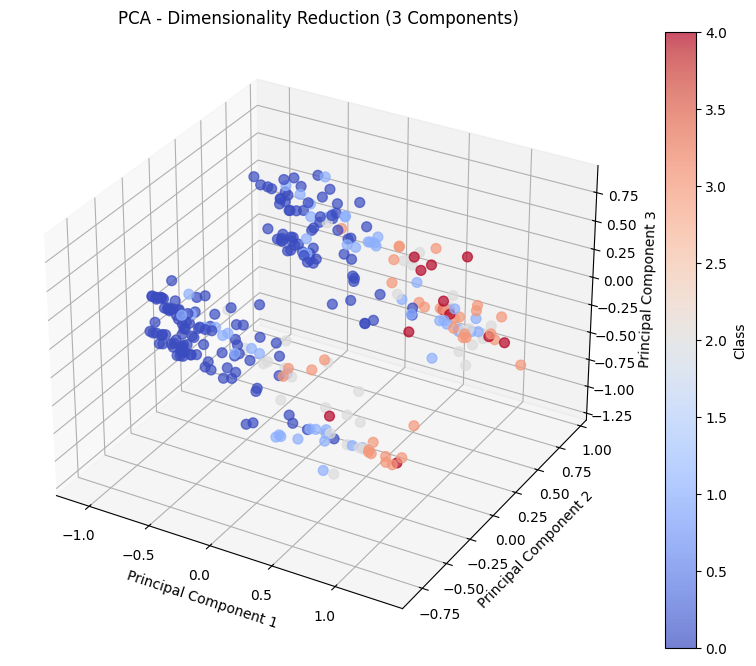

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"],
                c=pca_df['Class'], cmap='coolwarm', s=50, alpha=0.7)

# Adding color bar and labels
plt.colorbar(sc, label='Class')
ax.set_title('PCA - Dimensionality Reduction (3 Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

We can see more or less 2 clusters, but we will use a number of clusters = 5 as it corresponds to the number of classes.

### **3. Run K-means implementation**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

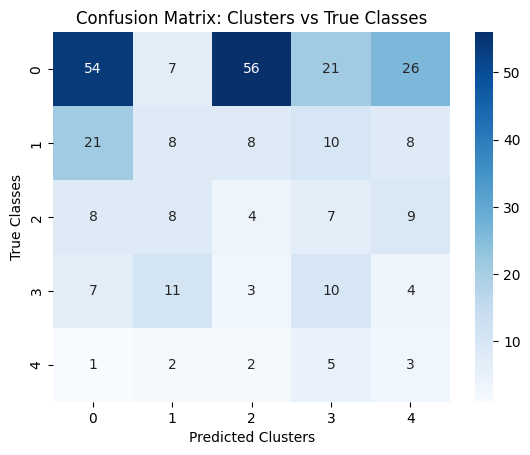

In [ ]:
# Predictions using scaled features
X = heart_disease.data.features.to_numpy()
k = len(heart_disease.data.targets["num"].unique())
centroids, y_pred = kmeans(X, k)

conf_matrix_kmeans = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
sns.heatmap(conf_matrix_kmeans, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Classes')
plt.title('Confusion Matrix: Clusters vs True Classes')
plt.show()

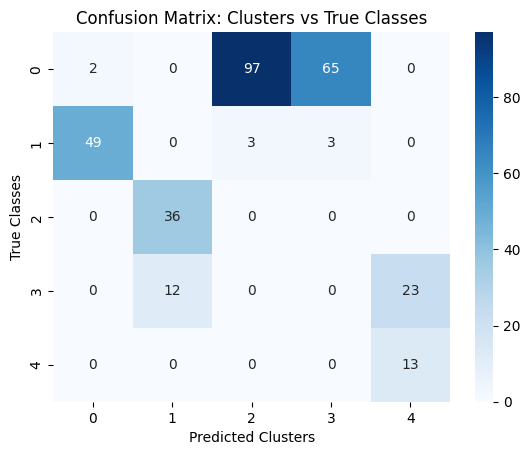

In [ ]:
# Predictions using pca features
X = pca_df.to_numpy()
k = len(heart_disease.data.targets["num"].unique())
centroids, y_pred = kmeans(X, k)
pca_df["kmeans"] = y_pred


conf_matrix_kmeans_scaled = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
sns.heatmap(conf_matrix_kmeans_scaled, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Classes')
plt.title('Confusion Matrix: Clusters vs True Classes')
plt.show()

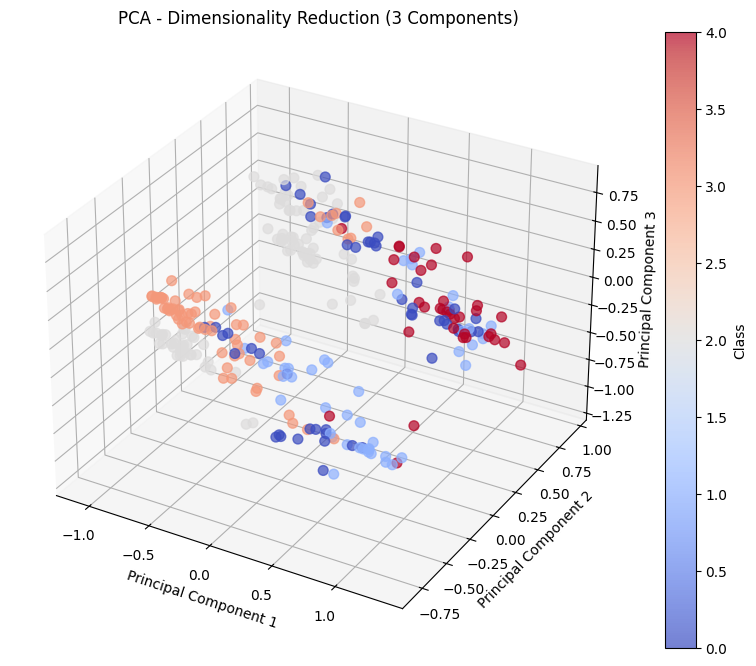

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"],
                c=pca_df['kmeans'], cmap='coolwarm', s=50, alpha=0.7)

# Adding color bar and labels
plt.colorbar(sc, label='Class')
ax.set_title('K-Means results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### **4. Spectral Clustering**

In [ ]:
from sklearn.cluster import SpectralClustering

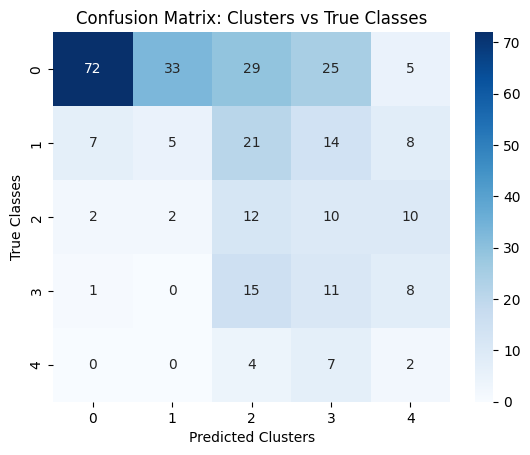

In [ ]:
# Using scaled features
spectral_cluster = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
labels = spectral_cluster.fit_predict(scaled_df)

conf_matrix_spec = confusion_matrix(y_true, labels)

# Plotting the confusion matrix
sns.heatmap(conf_matrix_spec, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Classes')
plt.title('Confusion Matrix: Clusters vs True Classes')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



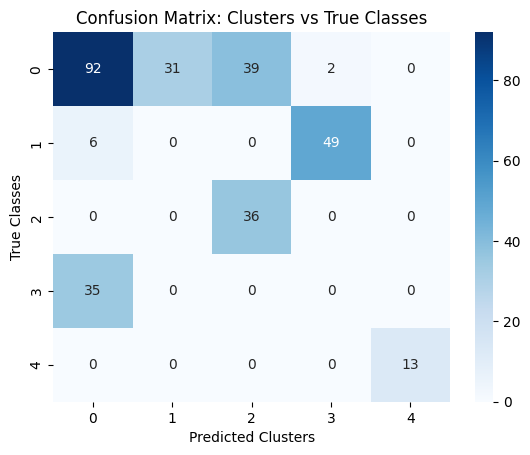

In [ ]:
# Using pca features
spectral_cluster = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
labels = spectral_cluster.fit_predict(pca_df)
pca_df["Spectral Cluster"] = labels

conf_matrix_spec = confusion_matrix(y_true, pca_df["Spectral Cluster"])

# Plotting the confusion matrix
sns.heatmap(conf_matrix_spec, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Classes')
plt.title('Confusion Matrix: Clusters vs True Classes')
plt.show()

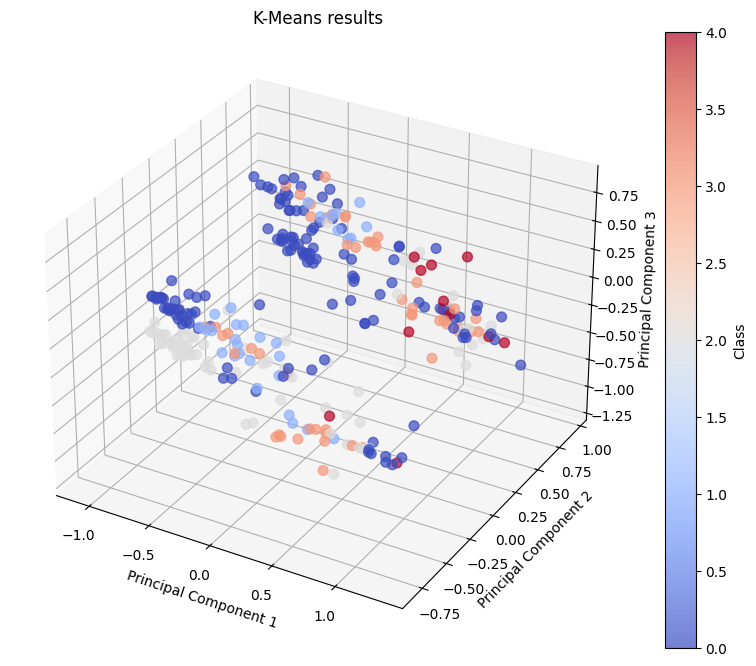

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"],
                c=pca_df['Spectral Cluster'], cmap='coolwarm', s=50, alpha=0.7)

# Adding color bar and labels
plt.colorbar(sc, label='Class')
ax.set_title('K-Means results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Although in both cases with just 3 PCA features we do not get very good results, we can see in the confusion matrix that with spectral clustering it will identify the classes more accurately.